In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting 

In [ ]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 116.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.13.0 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import tensorflow as tf
import keras
import zipfile
from google.colab import drive
import glob
from PIL import Image
import os
import pygad
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import json

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Loading dataset from: /content/drive/My Drive/combined_static_features_binary_top500.csv
Dataset shape: (12000, 2031)
Feature count: 2027
Label distribution:
label
1    6000
0    6000
Name: count, dtype: int64
Training samples: 9600, Test samples: 2400

===== Starting Genetic Algorithm for Binary Neural Network Optimization =====
Starting Genetic Algorithm optimization for binary classification neural network...

Generation 1/15
Evaluating chromosome 1/20...
Chromosome: {'num_layers': 3, 'neurons': [32, 16, 16, 128], 'dropout_rates': [0.43008858926329274, 0.26145103765143984, 0.13809274136958663, 0.39269342133338114], 'learning_rate': 0.005, 'batch_size': 128}
Fitness (val accuracy): 0.9354
Evaluating chromosome 2/20...
Chromosome: {'num_layers': 4, 'neurons': [128, 16, 256, 128], 'dropout_rates': [0.2977229020459977, 0.26910748295397713, 0.260632466223554, 0.4631373500157522], 'learning_rate': 0.001, 'batch_size': 64}
Fitness (val accuracy): 0.9391
Evaluating chromosome 3/20...
Chromo

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/GA_NN_binary_t500_final.h5
Scaler saved to /content/drive/My Drive/GA_NN_binary_scaler_t500.pkl
Training sample CSV created with 2027 features

===== Genetic Algorithm Neural Network Binary Training Complete =====


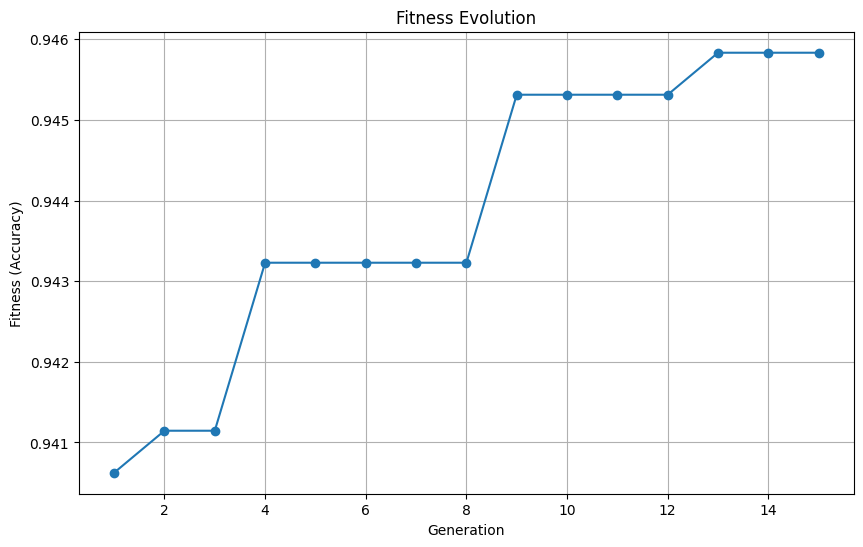

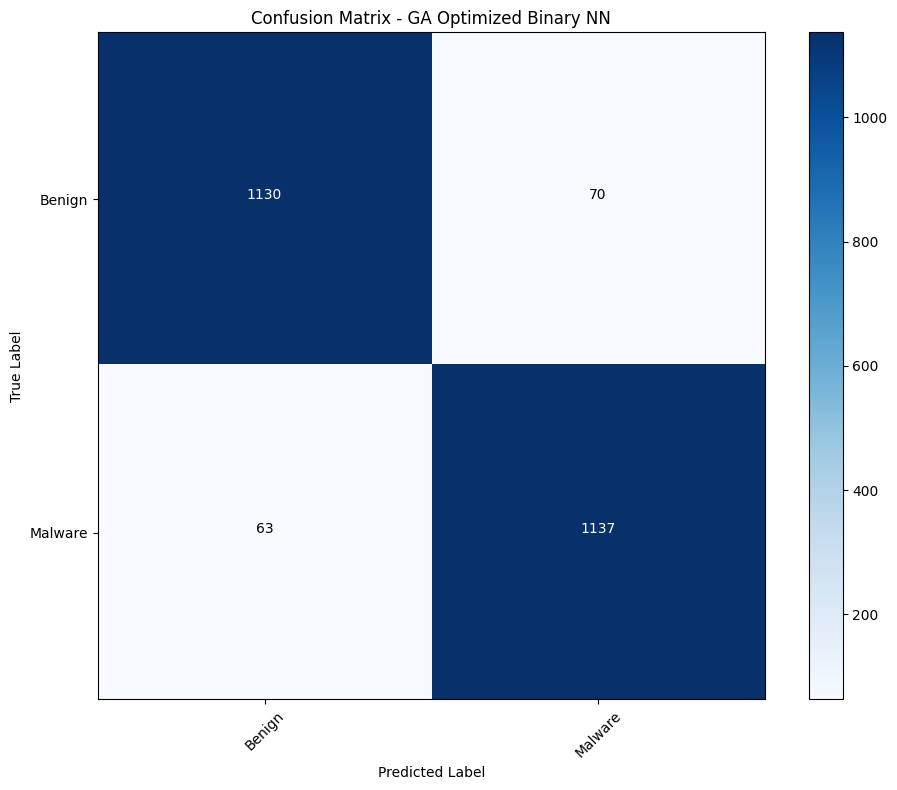

In [ ]:
# GA-MLP

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_binary_top500.csv')
df = pd.read_csv(csv_path)

print(f"Loading dataset from: {csv_path}")
print(f"Dataset shape: {df.shape}")

# Separate features and labels
X = df.drop(['app_id', 'category', 'binary_category', 'label'], axis=1)
y = df['label']

print(f"Feature count: {X.shape[1]}")
print("Label distribution:")
print(y.value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Initialize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tiếp tục tách từ tập huấn luyện ra tập validation (20% của train)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train)

class GeneticAlgorithm:
    def __init__(self, population_size=20, generations=10, mutation_rate=0.2, elite_size=2):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.chromosome_history = []
        self.fitness_history = []
        self.best_fitness = 0
        self.best_chromosome = None
        self.best_model = None
        self.best_history = None

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = {
                'num_layers': random.randint(1, 4),
                'neurons': [random.choice([16, 32, 64, 128, 256]) for _ in range(4)],
                'dropout_rates': [random.uniform(0.1, 0.5) for _ in range(4)],
                'learning_rate': random.choice([0.001, 0.01, 0.005, 0.0005]),
                'batch_size': random.choice([16, 32, 64, 128])
            }
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome, X_train_final, y_train_final, X_val, y_val, verbose=0):
        keras.backend.clear_session()

        num_layers = chromosome['num_layers']
        neurons = chromosome['neurons']
        dropout_rates = chromosome['dropout_rates']
        learning_rate = chromosome['learning_rate']
        batch_size = chromosome['batch_size']

        model = keras.Sequential()
        input_dim = X_train_final.shape[1]
        model.add(keras.layers.Dense(neurons[0], activation='relu', input_dim=input_dim))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rates[0]))
        for i in range(1, num_layers):
          model.add(keras.layers.Dense(neurons[i], activation='relu'))
          model.add(keras.layers.BatchNormalization())
          model.add(keras.layers.Dropout(dropout_rates[i]))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

        model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss='binary_crossentropy',
          metrics=['accuracy']
        )

        early_stopping = keras.callbacks.EarlyStopping(
          monitor='val_accuracy',
          patience=3,
          restore_best_weights=True
        )

        history = model.fit(
          X_train_final, y_train_final,
          validation_data=(X_val, y_val),
          epochs=10,
          batch_size=batch_size,
          callbacks=[early_stopping],
          verbose=verbose
        )

        _, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        return val_accuracy, model, history

    def select_parents(self, population, fitnesses):
        selected_parents = []
        elite_indices = np.argsort(fitnesses)[-self.elite_size:]
        for idx in elite_indices:
            selected_parents.append(population[idx])
        while len(selected_parents) < self.population_size:
            tournament_size = 3
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
            selected_parents.append(population[winner_idx])
        return selected_parents

    def crossover(self, parents):
        offspring = []
        offspring.extend(parents[:self.elite_size])
        while len(offspring) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)
            child = {}
            child['num_layers'] = parent1['num_layers'] if random.random() < 0.5 else parent2['num_layers']
            child['neurons'] = []
            child['dropout_rates'] = []
            for i in range(4):
                child['neurons'].append(parent1['neurons'][i] if random.random() < 0.5 else parent2['neurons'][i])
                child['dropout_rates'].append(parent1['dropout_rates'][i] if random.random() < 0.5 else parent2['dropout_rates'][i])
            child['learning_rate'] = parent1['learning_rate'] if random.random() < 0.5 else parent2['learning_rate']
            child['batch_size'] = parent1['batch_size'] if random.random() < 0.5 else parent2['batch_size']
            offspring.append(child)
        return offspring

    def mutate(self, offspring):
        for i in range(self.elite_size, len(offspring)):
            if random.random() < self.mutation_rate:
                param = random.choice(['num_layers', 'neurons', 'dropout_rates', 'learning_rate', 'batch_size'])
                if param == 'num_layers':
                    offspring[i]['num_layers'] = random.randint(1, 4)
                elif param == 'neurons':
                    layer_idx = random.randint(0, 3)
                    offspring[i]['neurons'][layer_idx] = random.choice([16, 32, 64, 128, 256])
                elif param == 'dropout_rates':
                    layer_idx = random.randint(0, 3)
                    offspring[i]['dropout_rates'][layer_idx] = random.uniform(0.1, 0.5)
                elif param == 'learning_rate':
                    offspring[i]['learning_rate'] = random.choice([0.001, 0.01, 0.005, 0.0005])
                elif param == 'batch_size':
                    offspring[i]['batch_size'] = random.choice([16, 32, 64, 128])
        return offspring

    def run(self, X_train_final, y_train_final, X_val, y_val):
        print("Starting Genetic Algorithm optimization for binary classification neural network...")
        population = self.create_initial_population()
        for generation in range(self.generations):
          print(f"\nGeneration {generation+1}/{self.generations}")
          fitnesses = []
          models = []
          histories = []

          for i, chromosome in enumerate(population):
              print(f"Evaluating chromosome {i+1}/{len(population)}...")
              fitness, model, history = self.calculate_fitness(
                chromosome, X_train_final, y_train_final, X_val, y_val)
              fitnesses.append(fitness)
              models.append(model)
              histories.append(history)
              print(f"Chromosome: {chromosome}\nFitness (val accuracy): {fitness:.4f}")

          best_idx = np.argmax(fitnesses)
          current_best_fitness = fitnesses[best_idx]
          current_best_chromosome = population[best_idx]
          if current_best_fitness > self.best_fitness:
            self.best_fitness = current_best_fitness
            self.best_chromosome = current_best_chromosome
            self.best_model = models[best_idx]
            self.best_history = histories[best_idx]

          self.chromosome_history.append(self.best_chromosome)
          self.fitness_history.append(self.best_fitness)
          print(f"Generation {generation+1} best fitness: {current_best_fitness:.4f}")
          print(f"Overall best fitness: {self.best_fitness:.4f}")

          parents = self.select_parents(population, fitnesses)
          offspring = self.crossover(parents)
          population = self.mutate(offspring)

        print("\nGenetic Algorithm completed!")
        print(f"Best chromosome: {self.best_chromosome}")
        print(f"Best fitness (val accuracy): {self.best_fitness:.4f}")
        return self.best_chromosome, self.best_fitness, self.best_model


    def plot_fitness_evolution(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history, marker='o')
        plt.title('Fitness Evolution')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Accuracy)')
        plt.grid(True)
        evolution_path = os.path.join(base_dir, "ga_fitness_evolution_binary_t500.png")
        plt.savefig(evolution_path)
        print(f"Fitness evolution plot saved to {evolution_path}")

print("\n===== Starting Genetic Algorithm for Binary Neural Network Optimization =====")
ga = GeneticAlgorithm(population_size=20, generations=15, mutation_rate=0.3, elite_size=3)
best_chromosome, best_fitness, best_model_ga = ga.run(X_train_final, y_train_final, X_val, y_val)
ga.plot_fitness_evolution()

# Evaluate and save the best model after all generations
loss, accuracy = best_model_ga.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Get predictions for binary classification
y_pred_prob = best_model_ga.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot and save confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - GA Optimized Binary NN')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malware'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to confusion matrix cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
cm_path = os.path.join(base_dir, "confusion_matrix_ga_nn_binary_t500.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

# Save the model
model_path = os.path.join(base_dir, "GA_NN_binary_t500_final.h5")
best_model_ga.save(model_path)
print(f"Model saved to {model_path}")

# Save scaler for inference
scaler_path = os.path.join(base_dir, "GA_NN_binary_scaler_t500.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

# Save best configuration
best_config = {
    'best_chromosome': best_chromosome,
    'best_fitness': best_fitness,
    'test_accuracy': float(accuracy)
}
with open(os.path.join(base_dir, "ga_best_configuration_binary_t500.json"), 'w') as f:
    json.dump(best_config, f, indent=4)

# Save training sample with feature names for future reference
sample_columns = X.columns.tolist()
training_sample = pd.DataFrame(columns=sample_columns)
training_sample.to_csv(os.path.join(base_dir, "training_sample_binary.csv"), index=False)
print(f"Training sample CSV created with {len(sample_columns)} features")

print("\n===== Genetic Algorithm Neural Network Binary Training Complete =====")

Loading dataset from: /content/drive/My Drive/combined_static_features_binary_top500.csv
Dataset loaded with shape: (12000, 2031)

Class distribution:
label
1    6000
0    6000
Name: count, dtype: int64
binary_category
malware    6000
benign     6000
Name: count, dtype: int64
Feature matrix shape: (12000, 2027)
Label vector shape: (12000,)
Validation Accuracy: 0.9276

Accuracy: 0.9354

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.94      0.94      1200
     Malware       0.94      0.93      0.94      1200

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



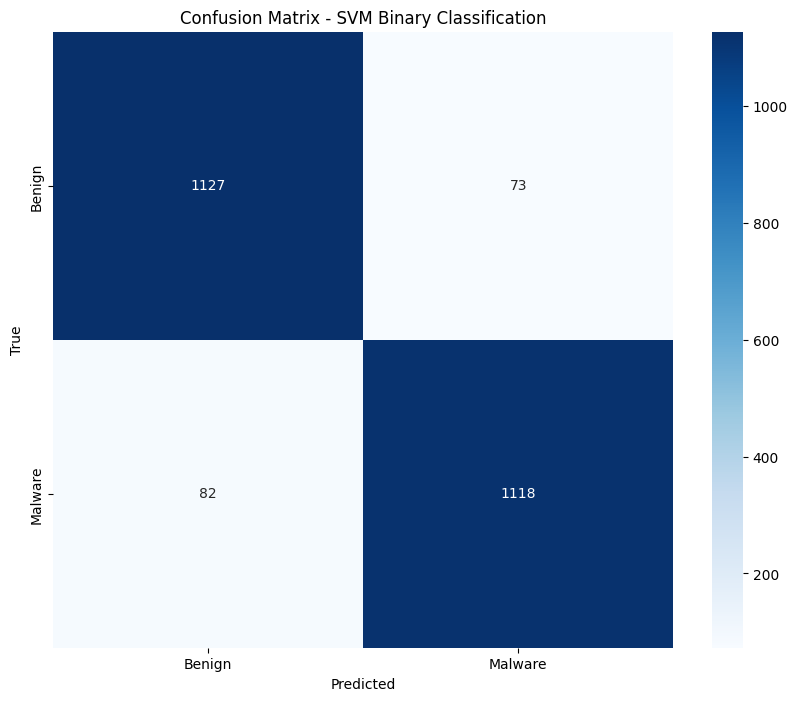

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_svm_binary.png
Model saved to /content/drive/My Drive/SVM_binary_top500.pkl
Scaler saved to /content/drive/My Drive/SVM_binary_scaler_top500.pkl


In [ ]:
# SVM

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_binary_top500.csv')

print(f"Loading dataset from: {csv_path}")
assert os.path.exists(csv_path), f"CSV file not found at {csv_path}"

df = pd.read_csv(csv_path)
print(f"Dataset loaded with shape: {df.shape}")

print("\nClass distribution:")
print(df['label'].value_counts())
print(df['binary_category'].value_counts())

X = df.drop(['app_id', 'category', 'binary_category', 'label'], axis=1)
y = df['label']
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")

# Chia ban đầu: train 80% / test 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tách từ train ra thêm validation: validation 20% của train_val (~16% của toàn bộ)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)
# Chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train mô hình với tập huấn luyện
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Đánh giá trên tập validation
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'],
            yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM Binary Classification')
confusion_matrix_path = os.path.join(base_dir, "confusion_matrix_svm_binary.png")
plt.savefig(confusion_matrix_path)
plt.show()
print(f"Confusion matrix saved to {confusion_matrix_path}")

# Save model
model_path = os.path.join(base_dir, "SVM_binary_top500.pkl")
scaler_path = os.path.join(base_dir, "SVM_binary_scaler_top500.pkl")

with open(model_path, 'wb') as f:
    pickle.dump(svm_model, f)

with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")

Loading dataset from: /content/drive/My Drive/combined_static_features_binary_top500.csv
Dataset loaded with shape: (12000, 2031)
Label distribution: label
1    6000
0    6000
Name: count, dtype: int64
Train shape: (7680, 2027), (7680,)
Test shape: (2400, 2027), (2400,)

---- Training Random Forest Model ------
Validation Accuracy: 0.9042
Accuracy: 0.8988

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.92      0.90      1200
     Malware       0.92      0.87      0.90      1200

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400

Model saved to /content/drive/My Drive/RF_binary_top500.pkl


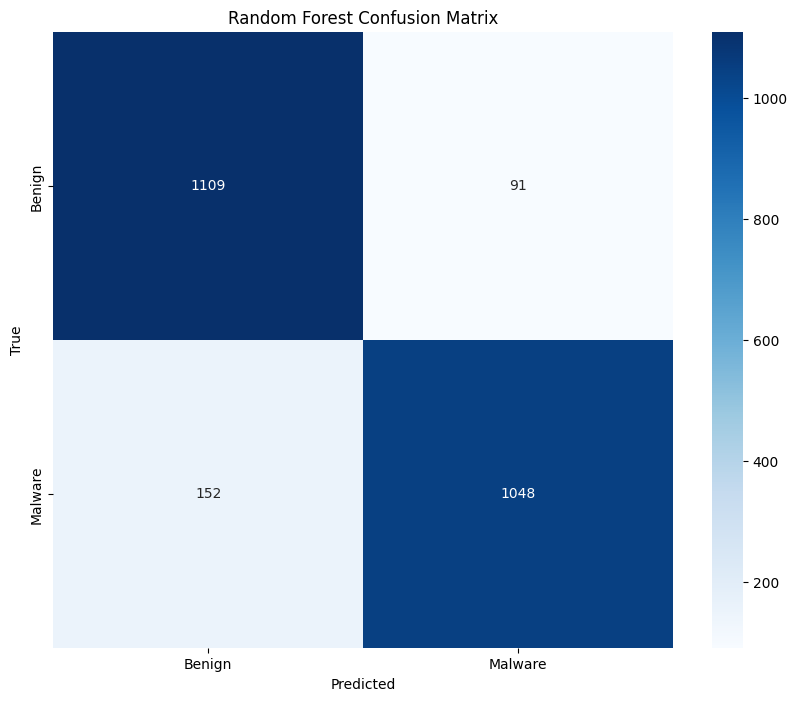

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_rf_binary_top500.png


In [ ]:
# Random Forest

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_binary_top500.csv')
print(f"Loading dataset from: {csv_path}")

df = pd.read_csv(csv_path)
print(f"Dataset loaded with shape: {df.shape}")

if 'label' not in df or set(df['label'].unique()) == {1}:
    df['label'] = df['category'].apply(lambda x: 0 if x.lower().startswith('benign') or x.lower().startswith('bengin') else 1)

X = df.drop(['app_id', 'category', 'binary_category', 'label'], axis=1)
y = df['label']

print("Label distribution:", y.value_counts())

# Chia ban đầu: train_val 80% / test 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chia tiếp train và validation: 80% train / 20% val từ tập train_val (~64%/16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

X_train_scaled = X_train
X_val_scaled = X_val
X_test_scaled = X_test

# Train Random Forest
print("\n---- Training Random Forest Model ------")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
# Huấn luyện
rf_model.fit(X_train_scaled, y_train)

# Đánh giá trên validation
y_val_pred = rf_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Đánh giá trên tập test
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# Save model
model_path = os.path.join(base_dir, "RF_binary_top500.pkl")

with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"Model saved to {model_path}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'],
            yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')

# Save the figure
confusion_matrix_path = os.path.join(base_dir, "confusion_matrix_rf_binary_top500.png")
plt.savefig(confusion_matrix_path)
plt.show()
print(f"Confusion matrix saved to {confusion_matrix_path}")

Loading dataset from: /content/drive/My Drive/combined_static_features_binary_top500.csv
Dataset loaded with shape: (12000, 2031)
Feature matrix shape: (12000, 2027)
Label vector shape: (12000,)
Train: (7680, 2027), Val: (1920, 2027), Test: (2400, 2027)

----- Training MLP model -----
Epoch 1/45
240/240 - 2s - loss: 0.3679 - accuracy: 0.8395 - val_loss: 0.1910 - val_accuracy: 0.9276 - 2s/epoch - 10ms/step
Epoch 2/45
240/240 - 1s - loss: 0.2023 - accuracy: 0.9254 - val_loss: 0.1669 - val_accuracy: 0.9328 - 811ms/epoch - 3ms/step
Epoch 3/45
240/240 - 1s - loss: 0.1793 - accuracy: 0.9365 - val_loss: 0.1698 - val_accuracy: 0.9370 - 818ms/epoch - 3ms/step
Epoch 4/45
240/240 - 1s - loss: 0.1695 - accuracy: 0.9396 - val_loss: 0.1627 - val_accuracy: 0.9328 - 816ms/epoch - 3ms/step
Epoch 5/45
240/240 - 1s - loss: 0.1455 - accuracy: 0.9466 - val_loss: 0.1630 - val_accuracy: 0.9375 - 800ms/epoch - 3ms/step
Epoch 6/45
240/240 - 1s - loss: 0.1316 - accuracy: 0.9512 - val_loss: 0.1610 - val_accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/MLP_binary_top500.h5
Scaler saved to /content/drive/My Drive/MLP_binary_scaler_top500.pkl


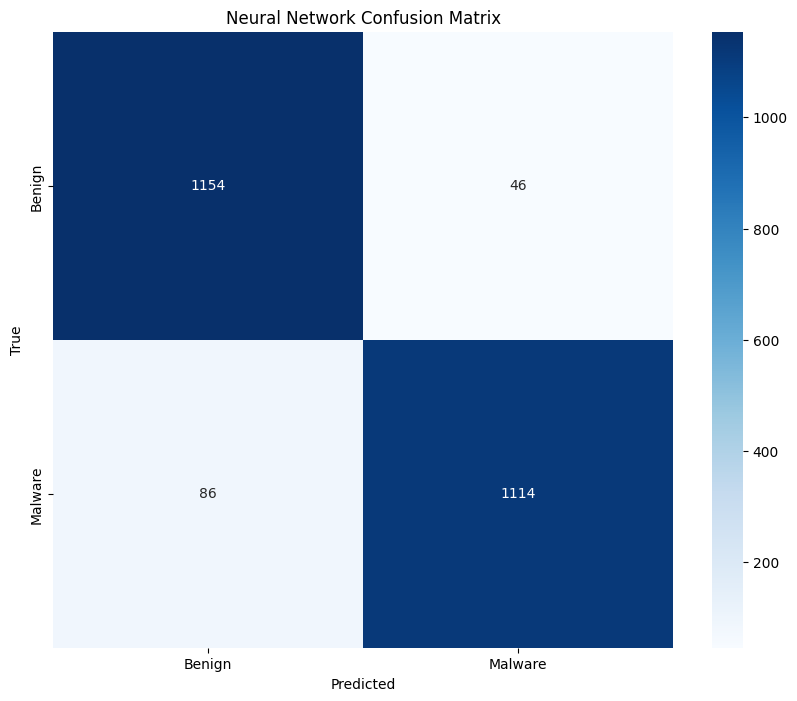

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_MLP_binary_top500.png


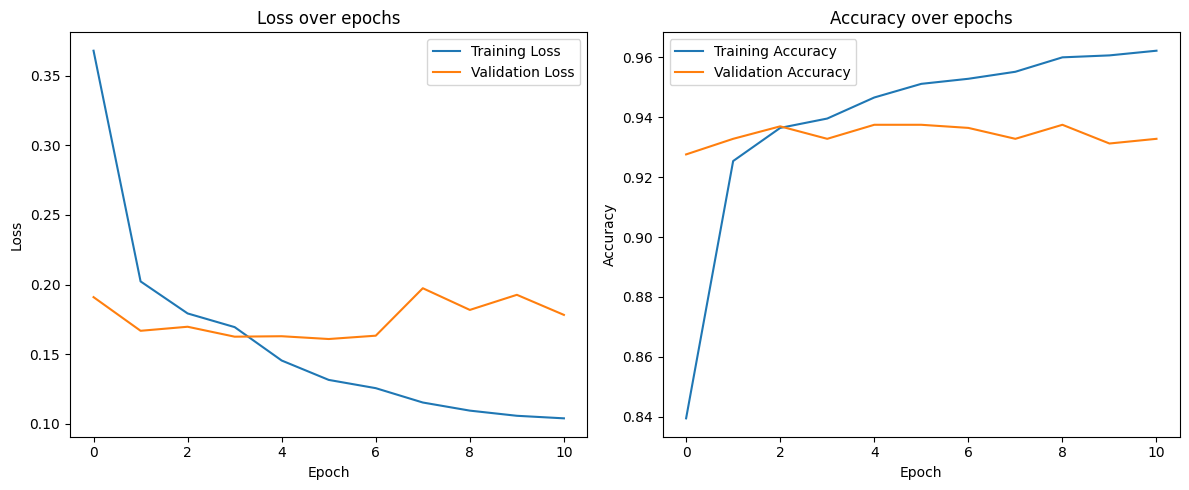

Training history plot saved to /content/drive/My Drive/MLP_binary_training_history_top500.png


In [ ]:
# MLP

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_binary_top500.csv')
print(f"Loading dataset from: {csv_path}")

df = pd.read_csv(csv_path)
print(f"Dataset loaded with shape: {df.shape}")

X = df.drop(['app_id', 'category', 'binary_category', 'label'], axis=1)
y = df['label']
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")

# Chia dữ liệu: 80% train_val / 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Chia tiếp: 80% train / 20% validation từ train_val (~64/16)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# Chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Training MLP
def train_neural_network():
    print("\n----- Training MLP model -----")

    # Clear any previous TensorFlow session
    tf.keras.backend.clear_session()

    # Define model architecture
    input_dim = X_train.shape[1]

    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_dim=input_dim),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping callback
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=45,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=2
    )

    # Evaluate on test data
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Get predictions for metrics
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

    # Save model
    model_path = os.path.join(base_dir, "MLP_binary_top500.h5")
    model.save(model_path)
    print(f"Model saved to {model_path}")

    # Save scaler (critical for future predictions)
    scaler_path = os.path.join(base_dir, "MLP_binary_scaler_top500.pkl")
    with open(scaler_path, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"Scaler saved to {scaler_path}")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malware'],
                yticklabels=['Benign', 'Malware'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Neural Network Confusion Matrix')

    # Save the figure
    confusion_matrix_path = os.path.join(base_dir, "confusion_matrix_MLP_binary_top500.png")
    plt.savefig(confusion_matrix_path)
    plt.show()
    print(f"Confusion matrix saved to {confusion_matrix_path}")

    return model, accuracy, history

# Train the model
nn_model, nn_accuracy, nn_history = train_neural_network()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['accuracy'], label='Training Accuracy')
plt.plot(nn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
history_plot_path = os.path.join(base_dir, "MLP_binary_training_history_top500.png")
plt.savefig(history_plot_path)
plt.show()
print(f"Training history plot saved to {history_plot_path}")


--- Iteration 1/10 ---
Ant 1: {'num_layers': 2, 'neurons': [64, 128, 16, 32], 'dropouts': [0.5, 0.5, 0.3, 0.4], 'learning_rate': 0.005, 'batch_size': 128}
 -> Accuracy: 0.9354
Ant 2: {'num_layers': 4, 'neurons': [64, 32, 128, 32], 'dropouts': [0.45, 0.4, 0.45, 0.2], 'learning_rate': 0.0005, 'batch_size': 128}
 -> Accuracy: 0.9411
Ant 3: {'num_layers': 3, 'neurons': [256, 16, 16, 256], 'dropouts': [0.1, 0.25, 0.1, 0.3], 'learning_rate': 0.01, 'batch_size': 128}
 -> Accuracy: 0.9286
Ant 4: {'num_layers': 2, 'neurons': [64, 64, 256, 64], 'dropouts': [0.45, 0.45, 0.4, 0.1], 'learning_rate': 0.005, 'batch_size': 32}
 -> Accuracy: 0.9328
Ant 5: {'num_layers': 4, 'neurons': [128, 64, 64, 64], 'dropouts': [0.15, 0.3, 0.15, 0.15], 'learning_rate': 0.005, 'batch_size': 128}
 -> Accuracy: 0.9344
Ant 6: {'num_layers': 2, 'neurons': [32, 256, 256, 256], 'dropouts': [0.15, 0.15, 0.35, 0.1], 'learning_rate': 0.001, 'batch_size': 32}
 -> Accuracy: 0.9396
Ant 7: {'num_layers': 1, 'neurons': [16, 256, 

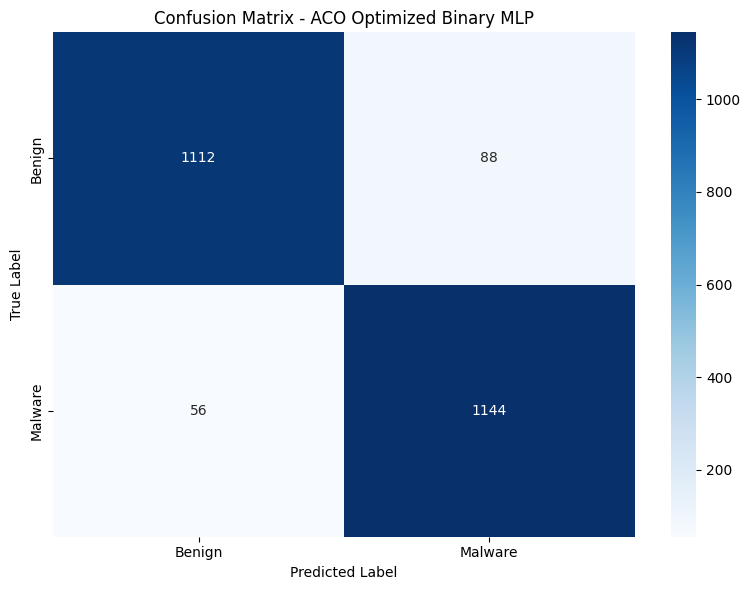

Confusion matrix saved to /content/drive/My Drive/confusion_matrix_aco_binary.png


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Best model saved to /content/drive/My Drive/ACO_binary_best_model.h5
Scaler saved to /content/drive/My Drive/ACO_binary_scaler.pkl


In [ ]:
# ACO-MLP

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_binary_top500.csv')
df = pd.read_csv(csv_path)

X = df.drop(['app_id', 'category', 'binary_category', 'label'], axis=1)
y = df['label']

# Chia 80% train_val / 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Chia tiếp: 80% train / 20% val trong train_val (~64/16)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

class AntColonyOptimizerBinary:
    def __init__(self, n_ants=10, n_iterations=10, evaporation_rate=0.3, alpha=1.0, beta=2.0):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta

        # Cập nhật đúng như yêu cầu
        self.layer_options = [1, 2, 3, 4]
        self.neuron_options = [16, 32, 64, 128, 256]
        self.dropout_options = np.round(np.arange(0.1, 0.51, 0.05), 2).tolist()
        self.lr_options = [0.0005, 0.001, 0.005, 0.01]
        self.batch_options = [16, 32, 64, 128]

        self.pheromones = {
            'num_layers': {k: 1.0 for k in self.layer_options},
            'neurons': {k: 1.0 for k in self.neuron_options},
            'dropouts': {k: 1.0 for k in self.dropout_options},
            'learning_rate': {k: 1.0 for k in self.lr_options},
            'batch_size': {k: 1.0 for k in self.batch_options}
        }

        self.best_model = None
        self.best_accuracy = 0
        self.best_config = None

    def _choose(self, options, pheromones):
        probs = np.array([(pheromones[opt] ** self.alpha) for opt in options])
        probs /= probs.sum()
        return np.random.choice(options, p=probs)

    def _build_config(self):
        return {
            'num_layers': self._choose(self.layer_options, self.pheromones['num_layers']),
            'neurons': [self._choose(self.neuron_options, self.pheromones['neurons']) for _ in range(4)],
            'dropouts': [self._choose(self.dropout_options, self.pheromones['dropouts']) for _ in range(4)],
            'learning_rate': self._choose(self.lr_options, self.pheromones['learning_rate']),
            'batch_size': self._choose(self.batch_options, self.pheromones['batch_size']),
        }

    def _evaluate(self, config):
        tf.keras.backend.clear_session()
        model = keras.Sequential()
        model.add(keras.layers.Dense(config['neurons'][0], activation='relu', input_shape=(X_train.shape[1],)))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(config['dropouts'][0]))

        for i in range(1, config['num_layers']):
            model.add(keras.layers.Dense(config['neurons'][i], activation='relu'))
            model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Dropout(config['dropouts'][i]))

        model.add(keras.layers.Dense(1, activation='sigmoid'))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=config['learning_rate']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=15,
            batch_size=config['batch_size'],
            verbose=0,
            callbacks=[early_stop]
         )

        _, acc = model.evaluate(X_val_scaled, y_val, verbose=0)
        return acc, model

    def _update_pheromones(self, configs, accuracies):
        for param in self.pheromones:
            for k in self.pheromones[param]:
                self.pheromones[param][k] *= (1 - self.evaporation_rate)
        for config, acc in zip(configs, accuracies):
            self.pheromones['num_layers'][config['num_layers']] += acc
            self.pheromones['learning_rate'][config['learning_rate']] += acc
            self.pheromones['batch_size'][config['batch_size']] += acc
            for i in range(config['num_layers']):
                self.pheromones['neurons'][config['neurons'][i]] += acc / config['num_layers']
                self.pheromones['dropouts'][config['dropouts'][i]] += acc / config['num_layers']

    def run(self):
        for it in range(self.n_iterations):
            print(f"\n--- Iteration {it+1}/{self.n_iterations} ---")
            configs = [self._build_config() for _ in range(self.n_ants)]
            accs = []
            for i, cfg in enumerate(configs):
                print(f"Ant {i+1}: {cfg}")
                acc, model = self._evaluate(cfg)
                accs.append(acc)
                print(f" -> Accuracy: {acc:.4f}")
                if acc > self.best_accuracy:
                    self.best_accuracy = acc
                    self.best_model = model
                    self.best_config = cfg
            self._update_pheromones(configs, accs)
        return self.best_model, self.best_config, self.best_accuracy


aco = AntColonyOptimizerBinary(n_ants=10, n_iterations=10)
best_model, best_config, best_acc = aco.run()

# Evaluate
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Accuracy on Test Set: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ACO Optimized Binary MLP')
plt.tight_layout()
cm_path = os.path.join(base_dir, "confusion_matrix_aco_binary.png")
plt.savefig(cm_path)
plt.show()
print(f"Confusion matrix saved to {cm_path}")

# Save Model
model_path = os.path.join(base_dir, "ACO_binary_best_model.h5")
best_model.save(model_path)
print(f"Best model saved to {model_path}")

# save scaler
scaler_path = os.path.join(base_dir, "ACO_binary_scaler.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")